In [152]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from helper_functions import read_lexical_net
from sklearn.cluster import KMeans
import json
from collections import defaultdict
import networkx as nx
from adjustText import adjust_text

In [187]:
with open("data/idx_to_id_map.json", "r") as f:
    idx_to_id_map = json.load(f)
with open("data/id_to_title_map.json", "r") as f:
    id_to_title_map = json.load(f)
with open("data/title_to_id_map.json", "r") as f:
    title_to_id_map = json.load(f)

In [131]:
filename = "wikilinks_lexical"

In [132]:
G_lexical = read_lexical_net("", filename)

In [146]:
pr = nx.pagerank(G_lexical, alpha=0.9)
sizes = np.array(list(pr.values()))
colors = np.array(list(pr.values()))
h = 50
l = 0
sizes = (sizes - min(sizes)) / (max(sizes) - min(sizes)) * (h - l) + l

In [133]:
nodeid_to_page_id_map = dict()
for node, label in G_lexical.nodes(data=True):
    nodeid_to_page_id_map[node] = label["label"]

In [134]:
EMBEDDING_FILENAME = "data/" + filename + ".emb"
embeddings = np.genfromtxt(EMBEDDING_FILENAME, delimiter=',')

In [264]:
embeddingsDf = pd.DataFrame(data = embeddings, columns = ['Embeddings1', 'Embeddings2'])

In [265]:
kmeans = KMeans(n_clusters=5)
clustering = kmeans.fit_predict(embeddings)

In [266]:
colors = ["#2e4d24", "#afb3b0", "#e38421", "#b3caa9", "#c53a48", "#650871", "#ff71ce", "#01cdfe", "#05ffa1", "#b967ff", "#fffb96"]
c = []
for i in clustering:
    c.append(colors[i])

In [267]:
clustered_pages = defaultdict(list)
for idx, cluster in enumerate(clustering):
    clustered_pages[cluster].append((G_lexical.degree[idx], nodeid_to_page_id_map[idx]))

In [268]:
kmeans.cluster_centers_

array([[-0.00732182, -0.02264821],
       [-1.42888085,  1.42905855],
       [ 1.42164516,  1.42345191],
       [-1.40022609, -1.41989899],
       [ 1.44221304, -1.40525476]])

In [269]:
cluster_zero = list(map(lambda el: (el[0], id_to_title_map[el[1]]), sorted(clustered_pages[0], reverse=True)))
cluster_one = list(map(lambda el: (el[0], id_to_title_map[el[1]]), sorted(clustered_pages[1], reverse=True)))
cluster_two = list(map(lambda el: (el[0], id_to_title_map[el[1]]), sorted(clustered_pages[2], reverse=True)))
cluster_three = list(map(lambda el: (el[0], id_to_title_map[el[1]]), sorted(clustered_pages[3], reverse=True)))
cluster_four = list(map(lambda el: (el[0], id_to_title_map[el[1]]), sorted(clustered_pages[4], reverse=True)))

In [270]:
for i in range(len(embeddings)):
    if embeddings[i][0] > 2 and embeddings[i][1] > 2:
        print(id_to_title_map[nodeid_to_page_id_map[i]])

Diego Barreto
Apostolska nunciatura na Češkoslovaškem
HMAS Yarra
Rissa, Norveška
Pomeni imen asteroidov: 210001–220000
Komet Catalina-LINEAR
Svetovno prvenstvo v hokeju na ledu 2005
458 Hercinija
Geodetska oficirska šola JLA
Zorić
Vezzani
Zabar
Zsadány
Zsana
Zsennye
Zsombó
Zsurk
Hruševska cesta, Ljubljana
Slovenski partizani
Dragojila Milek
Lesgor
Pontonx-sur-l'Adour
Saint-Yaguen
Perreux, Loire
Daniel Brière
Christian Bäckman
Saint-Julien, Rhône
Noyal-sur-Brutz
Petit-Auverné
Rejcov Grič
Takuma Asano
Peter Bondra
Muskulofascialna loža
Papež Aleksander II.
Cerkev sv. Andreja, Sobrače
Seznam bosansko-hercegovskih filmskih režiserjev
Svetovno prvenstvo v hokeju na ledu 2019
Gabrščkova ulica, Ljubljana
Seznam litovskih plavalcev
Vogrin
Seznam japonskih letalonosilk
Seznam srbskih jezikoslovcev
Seznam portugalskih atletov
Seznam osebnosti iz Občine Slovenske Konjice
Seznam osebnosti iz Občine Kranjska Gora
Seznam osebnosti iz Občine Ankaran
Seznam osebnosti iz Občine Beltinci
Seznam moldavsk

In [271]:
index_to_print = []
for i in range(len(embeddings)):
    if embeddings[i][0] > 3.5 and embeddings[i][1] > 3.5:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        index_to_print.append(i)
    if embeddings[i][0] < -3.5 and embeddings[i][1] > 3.5:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        index_to_print.append(i)
    if embeddings[i][0] < -3.5 and embeddings[i][1] < -3.5:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        index_to_print.append(i)
    if embeddings[i][0] > 3.5 and embeddings[i][1] < -3.5:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        index_to_print.append(i)

31. december
Seznam asteroidov (29501-29750)
USS Tiru (SS-416)
Školjić (Split)
Rissa, Norveška
Komet Catalina-LINEAR
Kanfen
Virje
Zalužnica
Vidrenjak
Žakanje
Mirlović Zagora
Trenkovo
Trnovac, Velika
Velika, Hrvaška
Nikolaj Ivanovič Lavrov
Zebecke
Zók
Zselicszentpál
Zsennye
Zsira
Zsujta
Henry Coyle Rath
U-4718
Feldmaršal (Indija)
32. honvedski pehotni polk (Avstro-Ogrska)
66. armada
Slatina, Šavnik
Zlatarić
Saint-Yaguen
Petit-Auverné
Kočićevo, Gradiška
Peter Bondra
49. gardna strelska divizija (ZSSR)
Lénora Guion-Firmin
Veronika Velez-Zuzulová
Daris
Župnija Volče
Seznam litovskih plavalcev
Caroline Wozniacki
Svetovno prvenstvo v biatlonu 2020
Odprto prvenstvo Francije 2020 - ženske dvojice
Seznam državnih sekretarjev Združenih držav Amerike
Tuljak
Juren
Seznam moldavskih biatloncev


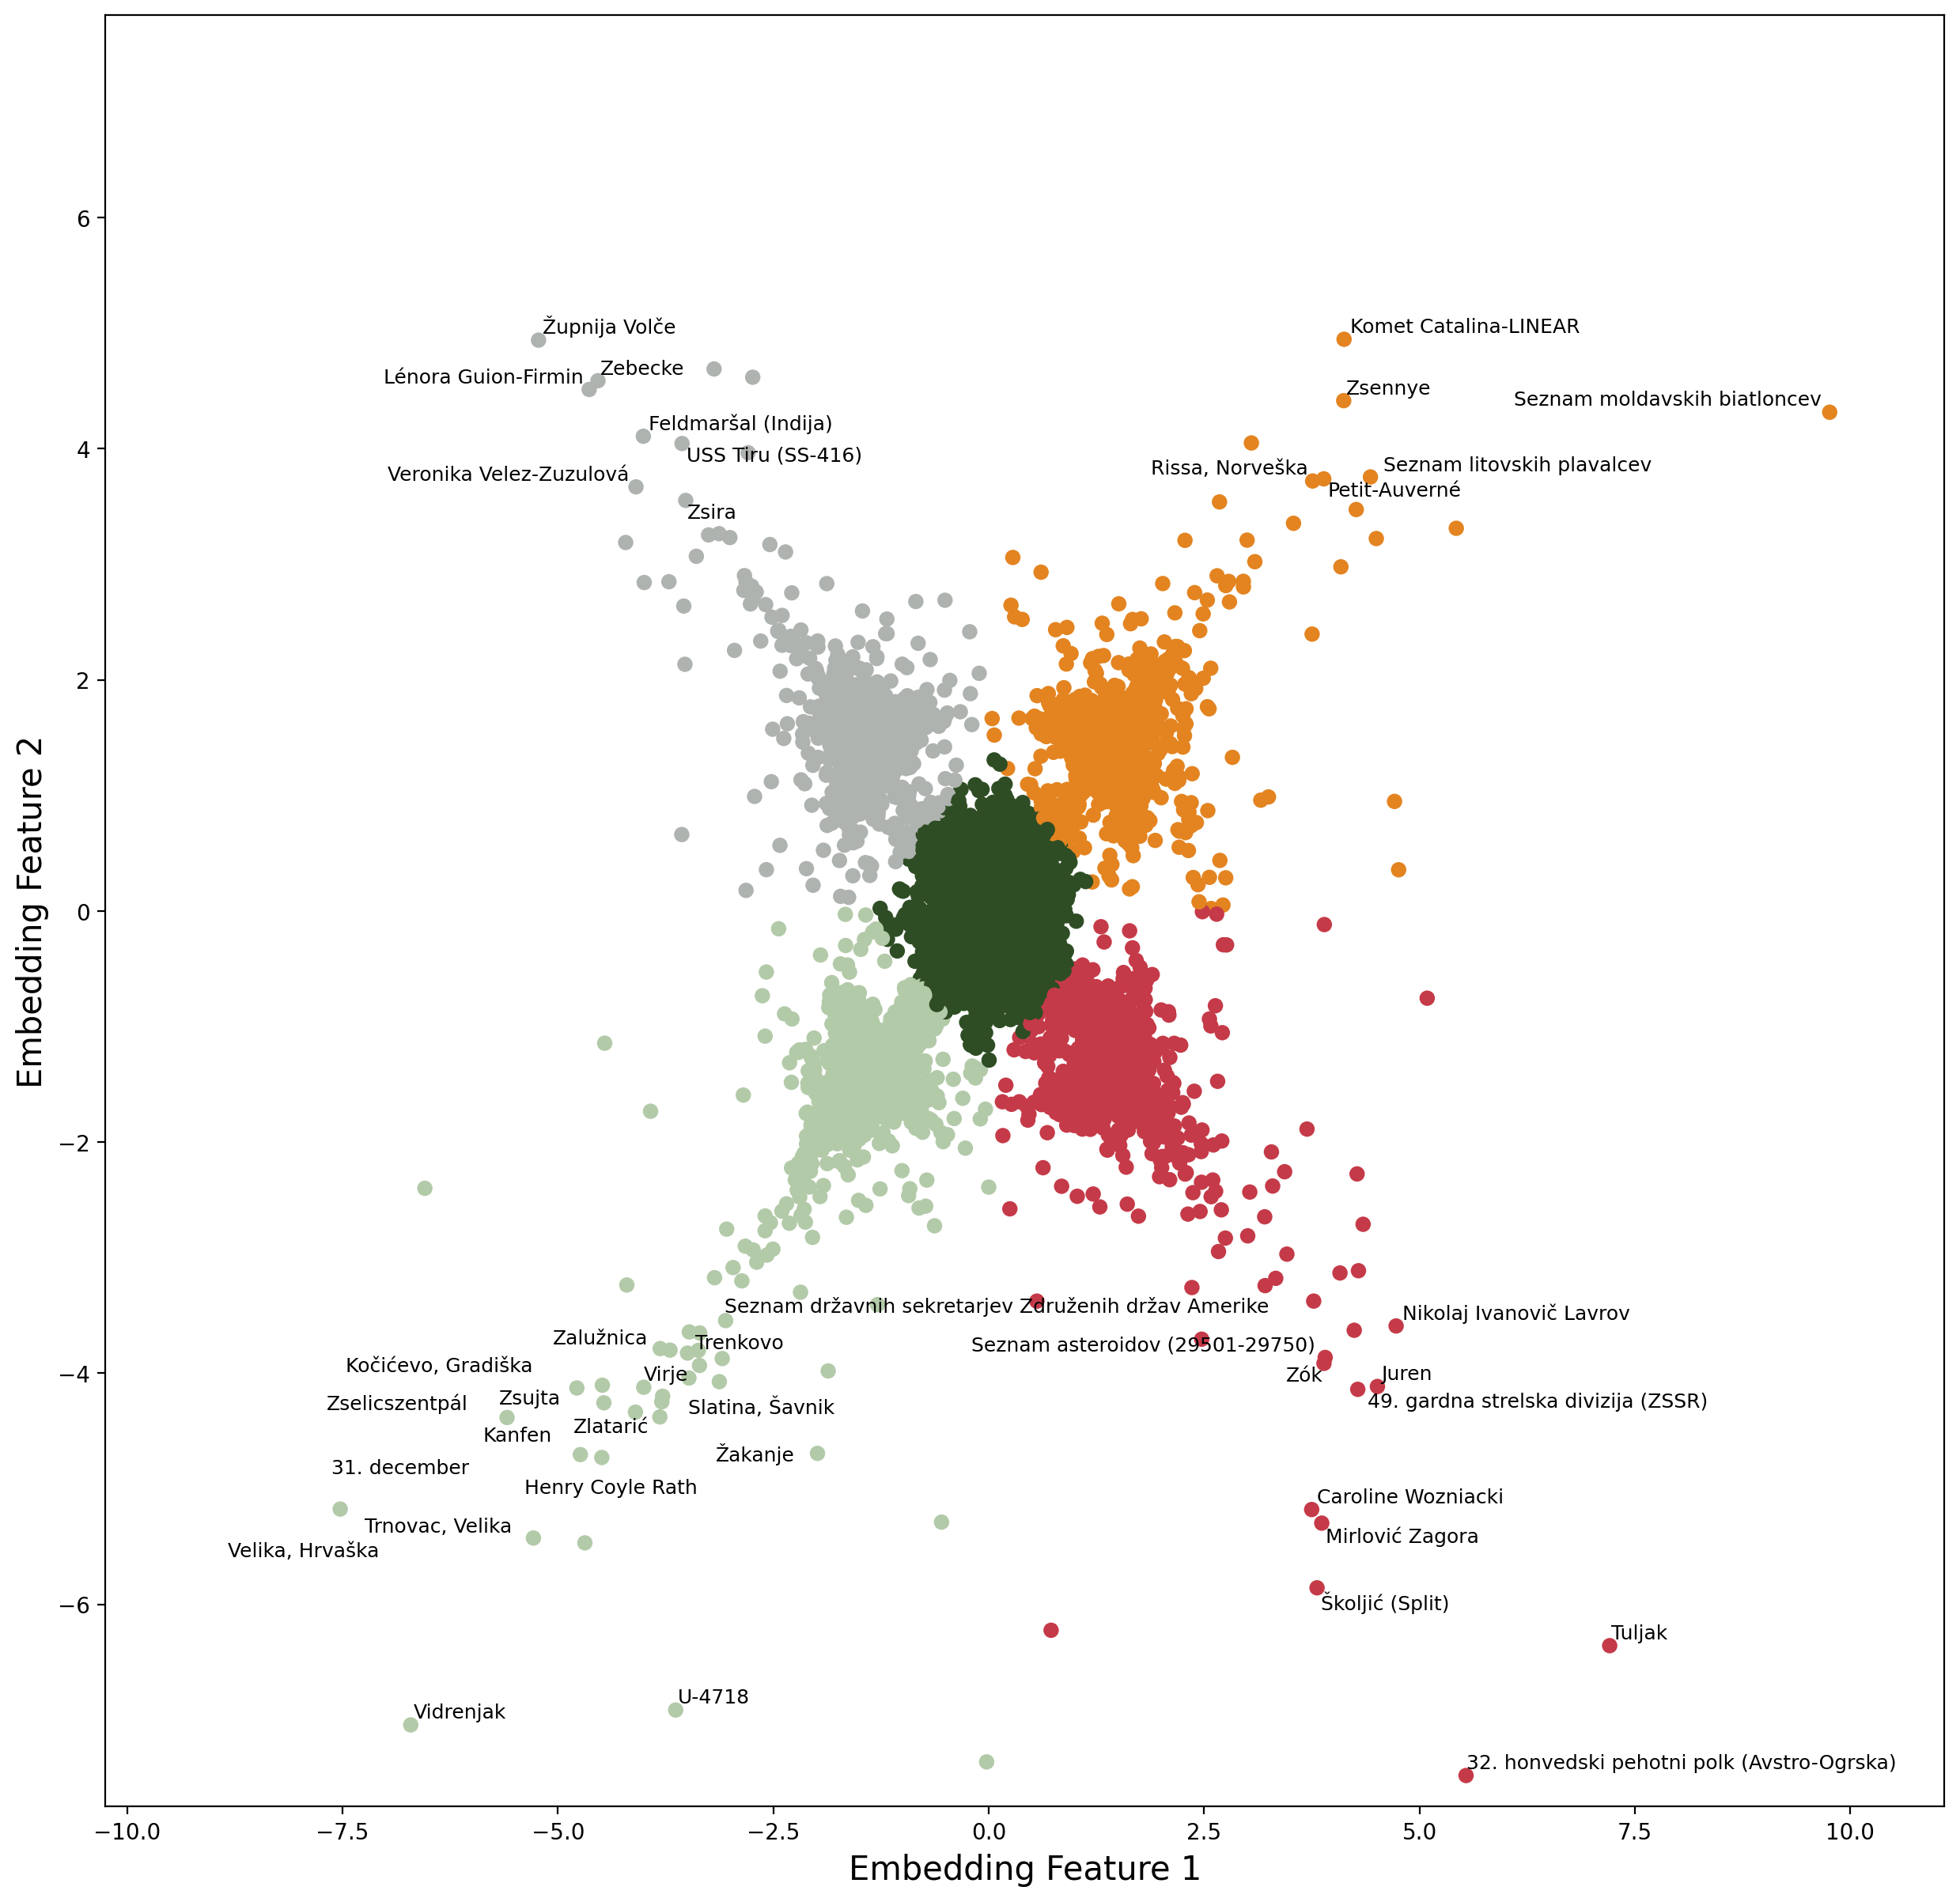

In [281]:
fig = plt.figure(figsize = (15,15), facecolor="white", dpi=200)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Embedding Feature 1', fontsize = 15)
ax.set_ylabel('Embedding Feature 2', fontsize = 15)

ax.scatter(embeddingsDf['Embeddings1'], embeddingsDf['Embeddings2'], c=c)

do_not_show = set([
    "Svetovno prvenstvo v biatlonu 2020",
    "Odprto prvenstvo Francije 2020 - ženske dvojice",
    "Peter Bondra",
    "Daris",
    "Saint-Yaguen",
    "66. armada"
])
texts = []
for i in index_to_print:
    x = embeddingsDf['Embeddings1'][i]
    y = embeddingsDf['Embeddings2'][i]
    if id_to_title_map[G_lexical.nodes(data=True)[i]["label"]] not in do_not_show:
        texts.append(plt.text(x, y, s=id_to_title_map[G_lexical.nodes(data=True)[i]["label"]], fontsize=9))

adjust_text(texts)

ax.set_xlim(xmin=-10.25)
ax.set_ylim(ymin=-7.75, ymax=7.75)
plt.savefig('communities.png', bbox_inches='tight', dpi=200)
plt.show()

In [247]:
embeddings_sample = embeddingsDf.sample(n=10000, random_state=1)

In [248]:
kmeans = KMeans(n_clusters=5)
clustering = kmeans.fit_predict(embeddings_sample)

colors = ["#2e4d24", "#afb3b0", "#e38421", "#b3caa9", "#c53a48", "#650871", "#ff71ce", "#01cdfe", "#05ffa1", "#b967ff", "#fffb96"]
c = []
for i in clustering:
    c.append(colors[i])

In [249]:
clustered_pages = defaultdict(list)
for idx, cluster in enumerate(clustering):
    clustered_pages[cluster].append((G_lexical.degree[idx], idx))

In [250]:
index_to_print = []
for i in range(kmeans.n_clusters):
    count = 0
    for degree, idx in sorted(clustered_pages[i], reverse=True):
        index_to_print.append(idx)
        if count == 5:
            break
        count += 1

In [260]:
to_print = ["Slovenija"]
index_to_print = []

count1, count2, count3, count4, count5 = 0, 0, 0, 0, 0
thres = 4
for i, row in embeddings_sample.iterrows():

    if embeddings[i][0] > 1.8 and embeddings[i][1] > 1.8:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        if count1 < thres:
            index_to_print.append(i)
            count1 += 1
    if embeddings[i][0] < -1.8 and embeddings[i][1] > 1.8:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        if count2 < thres:
            index_to_print.append(i)
            count2 += 1
    if embeddings[i][0] < -1.8 and embeddings[i][1] < -1.8:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        if count3 < thres:
            index_to_print.append(i)
            count3 += 1
    if embeddings[i][0] > 1.8 and embeddings[i][1] < -1.8:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        if count4 < thres:
            index_to_print.append(i)
            count4 += 1
    
    if embeddings[i][0] < 0.1 and embeddings[i][1] < 0.1 and embeddings[i][0] > -0.1 and embeddings[i][1] > -0.1:
        print(id_to_title_map[nodeid_to_page_id_map[i]])
        if count5 < thres:
            index_to_print.append(i)
            count5 += 1

1120
El Rocio, Malaga
Pristava pri Polhovem Gradcu
Ivan Potrč
Seznam rimskokatoliških škofov Celja
Boba, Madžarska
Svetovno prvenstvo v nordijskem smučanju 1935
Vojaškopomorsko tehniško vojaško učilišče JLA
Golec (razločitev)
Zahar Dimitrijevič Olsufjev
Presušnik
George Bush
Smodnik
Flego
Albit
Hrastje pri Cerkljah
Ford Orion
Rodrigo Luis de Borja y de Castro-Pinós
Heptaeder
Magic Johnson
Miss Slovenije 2017
Filip Kljajić
Silistra (okraj)
1071. grenadirski polk (Wehrmacht)
Furlan
Francisco Mendoza Bobadilla
Isao Ivabuči
Društvo slovenskih skladateljev
USS Entemedor (SS-340)
Mareda
Friedrich Gollwitzer
Občina Šmarješke Toplice
Predsednik Etiopije
Bečej
Železniška postaja Otiški Vrh
Goldberg (priimek)
Šagovina Cernička
Gornji Mosti
Kobile
Vinica pri Šmarjeti
Donja Sabanta
Dolge Njive
Seznam STOL letal
Štiristrani trapezoeder
Stefan Kretzschmar
Richard Eckl
Niki Bakogianni
Topniška ulica, Ljubljana
USS Aylwin
Reka, Koprivnica
Bob na Zimskih olimpijskih igrah 1932
Alan Stacey
Ekonomska fak

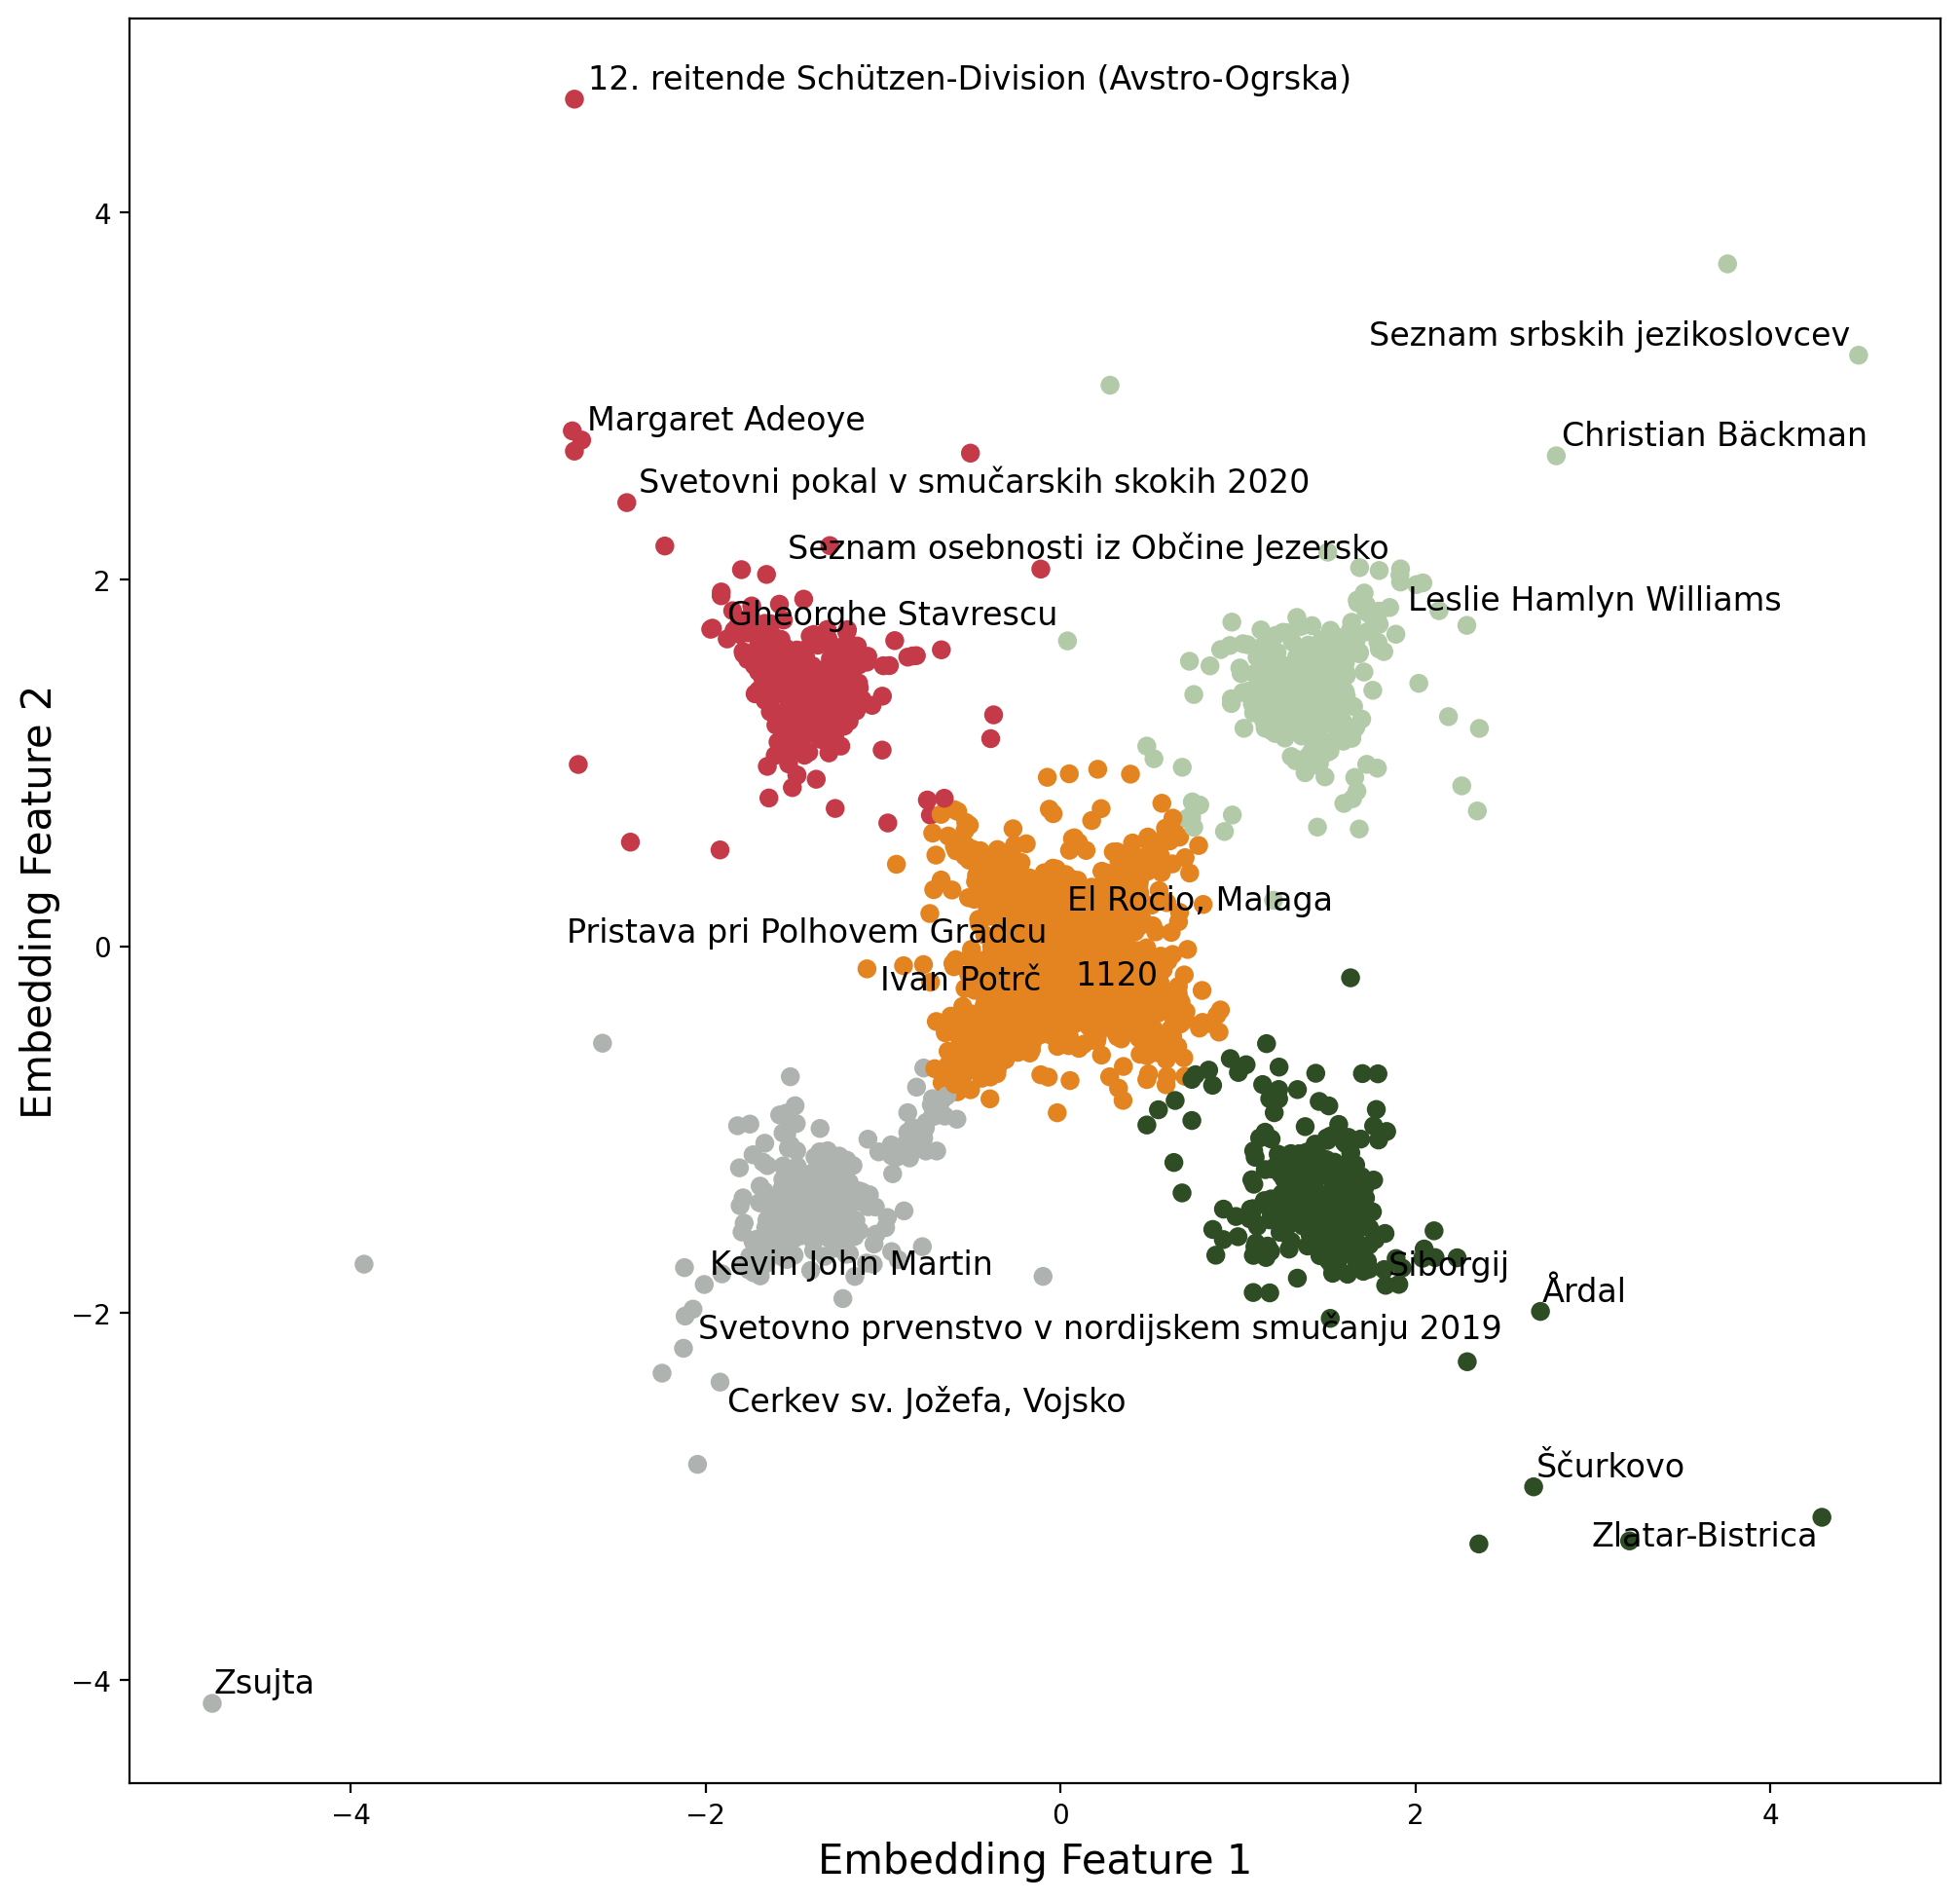

In [261]:
fig = plt.figure(figsize = (12,12), facecolor="white", dpi=200)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Embedding Feature 1', fontsize = 15)
ax.set_ylabel('Embedding Feature 2', fontsize = 15)

ax.scatter(embeddings_sample['Embeddings1'], embeddings_sample['Embeddings2'], c=c)

texts = []
for i in index_to_print:
    x = embeddingsDf['Embeddings1'][i]
    y = embeddingsDf['Embeddings2'][i]
    texts.append(plt.text(x, y, s=id_to_title_map[G_lexical.nodes(data=True)[i]["label"]], fontsize=12))

adjust_text(texts)

plt.show()